# Adult Income Classification

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 2. Import Data

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 3. Initial Analysis

In [3]:
data.shape

(48842, 15)

In [4]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.duplicated().sum()

52

## Data Visualization

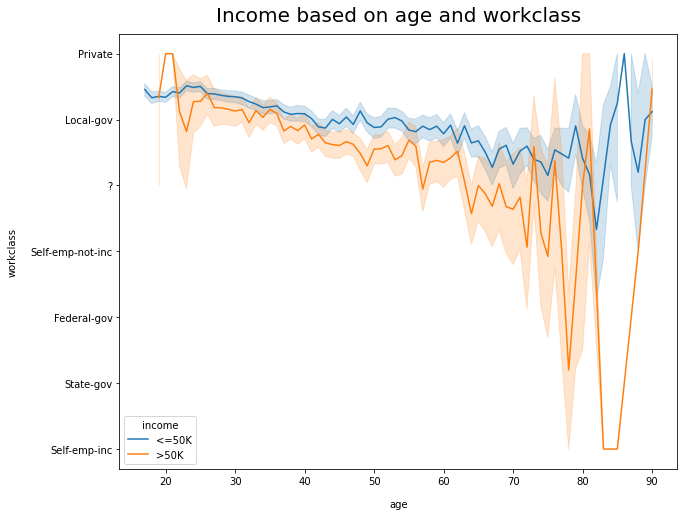

In [8]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='workclass', hue='income', data=data)
plt.title("Income based on age and workclass", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("workclass", labelpad=13)
ax = plt.gca()

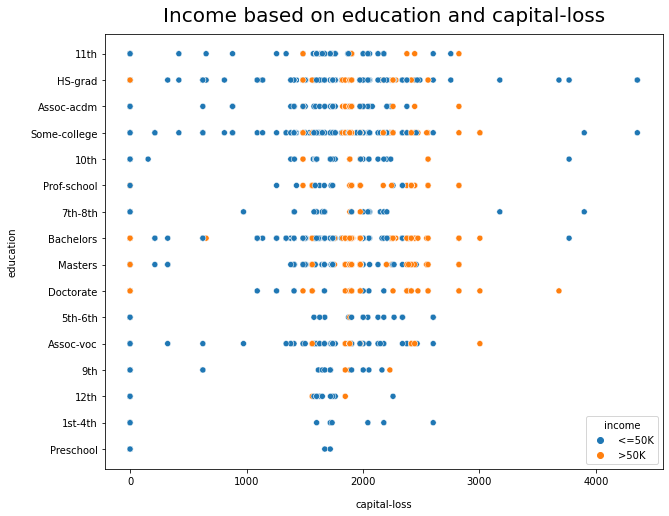

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='capital-loss', y='education', hue='income', data=data)
plt.title("Income based on education and capital-loss", y=1.015, fontsize=20)
plt.xlabel("capital-loss", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

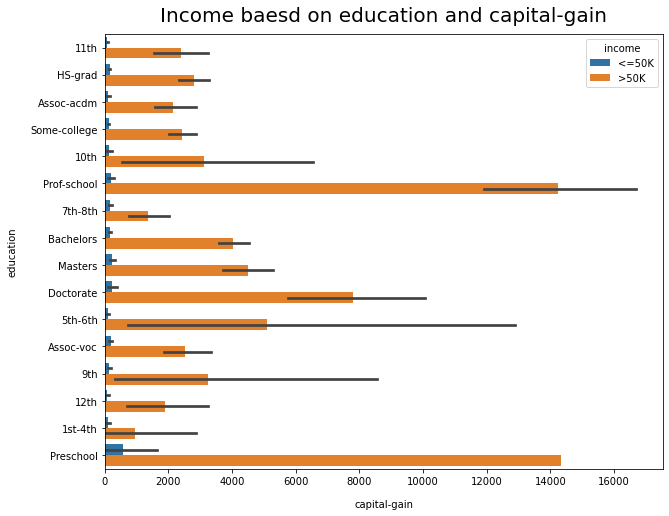

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x='capital-gain', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("capital-gain", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

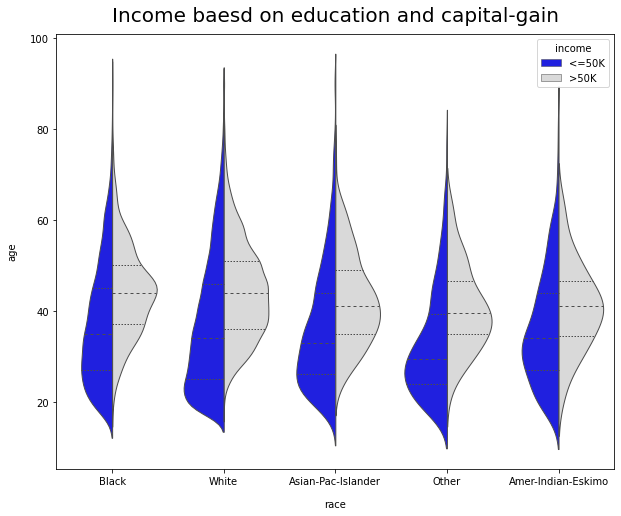

In [11]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x="race", y="age", hue="income",
               split=True, inner="quart", linewidth=1,
               palette={"<=50K": "b", ">50K": ".85"})
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("race", labelpad=13)
plt.ylabel("age", labelpad=13)
ax = plt.gca()

## 4. Data Preprocessing

In [12]:
#Removing duplicates
data=data.drop_duplicates()

In [13]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [14]:
# Removing unwanted features
data = data.drop(['fnlwgt', 'educational-num'], axis=1)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
# Filling NA
col_names = data.columns
for c in col_names:
    data = data.replace("?", np.NaN)
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [16]:
# Replacing column names
data.replace(['Divorced', 'Married-AF-spouse','Married-civ-spouse', 'Married-spouse-absent','Never-married', 'Separated', 'Widowed'],
             ['divorced', 'married', 'married', 'married','not married', 'not married', 'not married'], 
             inplace=True)

In [17]:
# Changing categorical variables to numeric
category_col = ['workclass', 'race', 'education', 'marital-status','occupation',
                'relationship', 'gender','native-country', 'income']

labelEncoder = preprocessing.LabelEncoder()
mapping_dict = {}
for col in category_col:
    data[col] = labelEncoder.fit_transform(data[col])
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}, 'race': {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital-status': {'divorced': 0, 'married': 1, 'not married': 2}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'g

## 5. Model Building

In [18]:
X = data.values[:, 0:12]
Y = data.values[:, 12]

## 6. Model Training || 7. Model Testing || 8. Model Evaluation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100, stratify=Y)

In [20]:
X_train.shape, y_train.shape

((34153, 12), (34153,))

In [21]:
X_test.shape, y_test.shape

((14637, 12), (14637,))

In [22]:
# Model Training
dt_clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,
                                     max_depth = 5,min_samples_leaf = 5)

dt_clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [23]:
# Model Testing and evaluation
y_pred_gini = dt_clf_gini.predict(X_test)
print ("Decision Tree using Gini Index\nAccuracy is ",accuracy_score(y_test, y_pred_gini)*100 )

Decision Tree using Gini Index
Accuracy is  82.74919723987156


## 9. Model Deployment 

In [24]:
from pickle import dump

In [25]:
dump(dt_clf_gini, open('model.pkl','wb'))